# Classification Problem (Cylinders)

Make a copy of the data before mutating

Let's take a closer look at the data

In [3]:
data <- mtcars
?mtcars

mtcars                package:datasets                 R Documentation

_M_o_t_o_r _T_r_e_n_d _C_a_r _R_o_a_d _T_e_s_t_s

_D_e_s_c_r_i_p_t_i_o_n:

     The data was extracted from the 1974 _Motor Trend_ US magazine,
     and comprises fuel consumption and 10 aspects of automobile design
     and performance for 32 automobiles (1973-74 models).

_U_s_a_g_e:

     mtcars
     
_F_o_r_m_a_t:

     A data frame with 32 observations on 11 variables.

       [, 1]  mpg   Miles/(US) gallon                        
       [, 2]  cyl   Number of cylinders                      
       [, 3]  disp  Displacement (cu.in.)                    
       [, 4]  hp    Gross horsepower                         
       [, 5]  drat  Rear axle ratio                          
       [, 6]  wt    Weight (1000 lbs)                        
       [, 7]  qsec  1/4 mile time                            
       [, 8]  vs    V/S                                      
       [, 9]  am    Transmission (0 = automatic, 1 = manual) 
       [,10]  gear  Number of forward gears                  
       [,11]  carb  Number of carburetors                    
      
_S_o_u_r_c_e:

     Henderson and Velleman (1981), Building multiple regression models
     interactively.  _Biometrics_, *37*, 391-411.

_E_x_a_m_p_l_e_s:

     require(graphics)
     pairs(mtcars, main = "mtcars data")
     coplot(mpg ~ disp | as.factor(cyl), data = mtcars,
            panel = panel.smooth, rows = 1)

### Make factors
We want to use factors when possible (discrete values)

In [4]:
data$vs <- factor(as.integer(data$vs), levels = c(0, 1), labels = c('straight', 'v'))
data$am <- factor(as.integer(data$am), levels = c(0, 1), labels = c('automatic', 'manual'))
data$gear <- factor(as.integer(data$gear), levels = 3:5, labels = c('three','four','five'))
data$carb <- factor(as.integer(data$carb), levels = 1:8, labels = c('one', 'two', 'three','four','five','six','seven','eight'))

data$cyl <- factor(as.integer(data$cyl), levels = c(4,6,8), labels = c('Four Cyl.', 'Six Cyl.', 'Eight Cyl.'))
summary(data$cyl)

Four Cyl.   Six Cyl. Eight Cyl. 
        11          7         14

### Split the test and train data
This time no set.seed() call, so random. Rerun notebook to see different results.

In [5]:
library(caret)
index.train <- createDataPartition(data$cyl, p = 0.7, list = FALSE)
train = data[index.train,]
test  = data[-(index.train), ]

### Train
We will use a tuning grid to find the best model and best hyperparameters

In [6]:
tg <- data.frame(.decay = 30:50/40)
tg
model <- train(cyl ~ .,
               data = train,
               method = "multinom",
               tuneGrid = tg)

,.decay
1,0.75
2,0.775
3,0.8
4,0.825
5,0.85
6,0.875
7,0.9
8,0.925
9,0.95
10,0.975


Loading required package: nnet


# weights:  57 (36 variable)
initial  value 25.268083 
iter  10 value 3.239468
iter  20 value 1.836923
iter  30 value 1.554416
iter  40 value 1.538036
final  value 1.538032 
converged
# weights:  57 (36 variable)
initial  value 25.268083 
iter  10 value 3.263061
iter  20 value 1.864364
iter  30 value 1.579585
iter  40 value 1.567212
final  value 1.567211 
converged
# weights:  57 (36 variable)
initial  value 25.268083 
iter  10 value 3.286490
iter  20 value 1.891256
iter  30 value 1.605222
iter  40 value 1.595886
final  value 1.595885 
converged
# weights:  57 (36 variable)
initial  value 25.268083 
iter  10 value 3.309859
iter  20 value 1.918163
iter  30 value 1.631713
iter  40 value 1.624077
final  value 1.624077 
converged
# weights:  57 (36 variable)
initial  value 25.268083 
iter  10 value 3.333267
iter  20 value 1.945149
iter  30 value 1.658809
iter  40 value 1.651806
final  value 1.651805 
converged
# weights:  57 (36 variable)
initial  value 25.268083 
iter  10 value 3.356812
i

### View Model

Note the line "was used to select the best..." because of the tuning grid

In [7]:
model
summary(model)

Penalized Multinomial Regression 

23 samples
10 predictors
 3 classes: 'Four Cyl.', 'Six Cyl.', 'Eight Cyl.' 

No pre-processing
Resampling: Bootstrapped (25 reps) 
Summary of sample sizes: 23, 23, 23, 23, 23, 23, ... 
Resampling results across tuning parameters:

  decay  Accuracy   Kappa    
  0.750  0.9274747  0.8874878
  0.775  0.9274747  0.8874878
  0.800  0.9274747  0.8874878
  0.825  0.9274747  0.8874878
  0.850  0.9274747  0.8874878
  0.875  0.9274747  0.8874878
  0.900  0.9274747  0.8874878
  0.925  0.9274747  0.8874878
  0.950  0.9274747  0.8874878
  0.975  0.9274747  0.8874878
  1.000  0.9274747  0.8874878
  1.025  0.9274747  0.8874878
  1.050  0.9274747  0.8874878
  1.075  0.9274747  0.8874878
  1.100  0.9274747  0.8874878
  1.125  0.9274747  0.8874878
  1.150  0.9274747  0.8874878
  1.175  0.9274747  0.8874878
  1.200  0.9224747  0.8803842
  1.225  0.9224747  0.8803842
  1.250  0.9224747  0.8803842

Accuracy was used to select the optimal model using  the largest value.
T

Warning message:
In sqrt(diag(vc)): NaNs produced

Call:
multinom(formula = .outcome ~ ., data = dat, decay = param$decay)

Coefficients:
           (Intercept)        mpg       disp         hp        drat          wt
Six Cyl.   -0.00398286 -0.2713059 0.06707655 0.02553824 -0.05481337 -0.04091687
Eight Cyl. -0.02633115 -0.7243352 0.09809860 0.05681364 -0.08794656 -0.04010153
                 qsec         vsv    ammanual     gearfour    gearfive
Six Cyl.   -0.3434293 -0.06437213  0.05351368 -0.014968074  0.01487031
Eight Cyl. -0.5596891 -0.06475632 -0.03197827 -0.004731209 -0.02726421
               carbtwo   carbthree     carbfour carbfive     carbsix carbseven
Six Cyl.   -0.15727037 -0.05217348  0.113367837        0  0.04125563         0
Eight Cyl.  0.01797264  0.05217714 -0.004466842        0 -0.02737934         0
               carbeight
Six Cyl.   -3.110651e-05
Eight Cyl.  2.752028e-05

Std. Errors:
           (Intercept)      mpg      disp        hp     drat       wt     qsec
Six Cyl.       1.29135 1.282703 0.2314568 0.1352401 11.

### Predict

In [8]:
test$predicted <- predict(model, test)

### View Results

In [9]:
test[, c('cyl', 'predicted')]

,cyl,predicted
Merc 280,Six Cyl.,Six Cyl.
Merc 280C,Six Cyl.,Six Cyl.
Merc 450SLC,Eight Cyl.,Eight Cyl.
Chrysler Imperial,Eight Cyl.,Eight Cyl.
Fiat 128,Four Cyl.,Four Cyl.
Honda Civic,Four Cyl.,Four Cyl.
Toyota Corona,Four Cyl.,Four Cyl.
Dodge Challenger,Eight Cyl.,Eight Cyl.
Camaro Z28,Eight Cyl.,Eight Cyl.


### Confusion Matrix

In [11]:
cm <- confusionMatrix(test$predicted, test$cyl)
cm

Confusion Matrix and Statistics

            Reference
Prediction   Four Cyl. Six Cyl. Eight Cyl.
  Four Cyl.          3        0          0
  Six Cyl.           0        2          0
  Eight Cyl.         0        0          4

Overall Statistics
                                     
               Accuracy : 1          
                 95% CI : (0.6637, 1)
    No Information Rate : 0.4444     
    P-Value [Acc > NIR] : 0.0006766  
                                     
                  Kappa : 1          
 Mcnemar's Test P-Value : NA         

Statistics by Class:

                     Class: Four Cyl. Class: Six Cyl. Class: Eight Cyl.
Sensitivity                    1.0000          1.0000            1.0000
Specificity                    1.0000          1.0000            1.0000
Pos Pred Value                 1.0000          1.0000            1.0000
Neg Pred Value                 1.0000          1.0000            1.0000
Prevalence                     0.3333          0.2222            0

In [19]:
as.data.frame(cm$table)

,Prediction,Reference,Freq
1,Four Cyl.,Four Cyl.,3
2,Six Cyl.,Four Cyl.,0
3,Eight Cyl.,Four Cyl.,0
4,Four Cyl.,Six Cyl.,0
5,Six Cyl.,Six Cyl.,2
6,Eight Cyl.,Six Cyl.,0
7,Four Cyl.,Eight Cyl.,0
8,Six Cyl.,Eight Cyl.,0
9,Eight Cyl.,Eight Cyl.,4


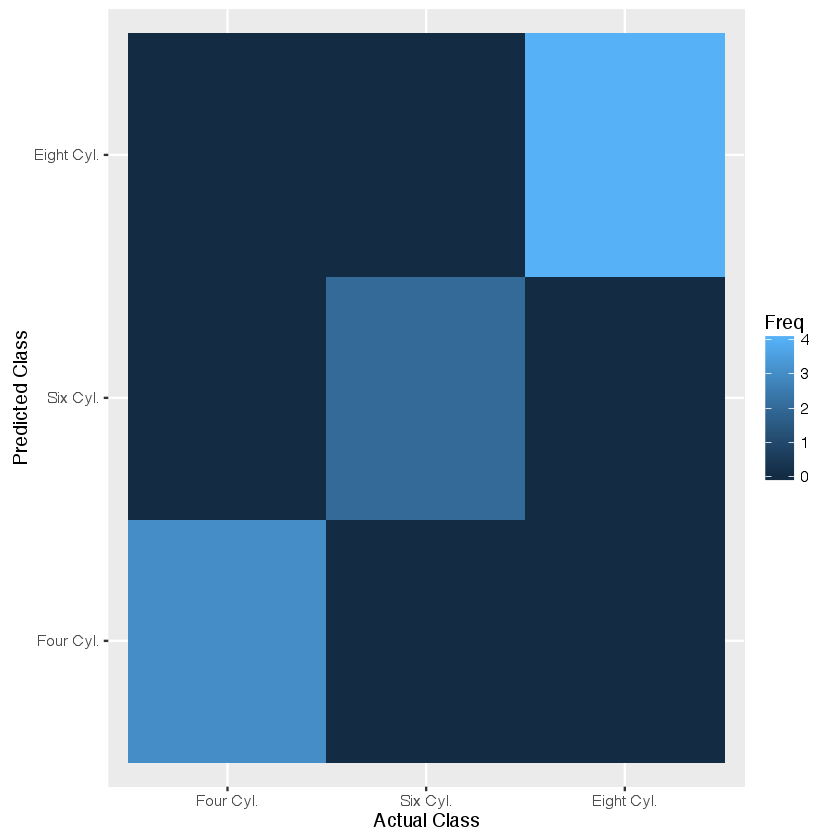

In [20]:
ggplot(as.data.frame(cm$table)) + 
  geom_tile(aes(x=Prediction, y=Reference, fill=Freq)) + 
  scale_x_discrete(name="Actual Class") + 
  scale_y_discrete(name="Predicted Class")